# SMIPP 21/22 - Exercise Sheet 7

## Prof. Dr. K. Reygers, Dr. R. Stamen, Dr. M. Völkl

## Hand in by: Thursday, December 9th: 12:00
### Submit the file(s) through the Übungsgruppenverwaltung


### Names (up to two):
### Points:      

## 7.1 Unbinned maximum-likelihood fit with Gaussian parameter constraint (10 points)

This problem is based on the [example of an unbinned maximum likelihood fit](https://nbviewer.org/urls/www.physi.uni-heidelberg.de/~reygers/lectures/2021/smipp/ml_fit_example_iminuit.ipynb) from the lecture. Here we consider the case that we have an external Gaussian constraint on the parameter $a$. The likelihood function can then be written as 

$$ L(a,b) = \frac{1}{\sqrt{2 \pi} \sigma_{a}} \exp \left( -\frac{(a - a_\mathrm{meas})^2}{2 \sigma_a^2} \right) \prod_{i} f(x_i; a, b)$$

The external information on parameter $a$ is $a_\mathrm{meas} = 0.5 \pm 0.01$. Perform a unbinned maximum likelihood fit for this likelihood function. Does the constraint for $a$ significantly improve the uncertainty of parameter $b$ in this example?

## Solution:

## 7.2 Kolmogorov-Smirnov test (10 points)

The code snippet below reads 100 measurements drawn from the same underlying distribution.

a) Plot a normalized histogram of the data along with a standard normal distribution ($\mu = 0$, $\sigma = 1$), see [*scipy.stats.norm*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html). Plot also the empirical distribution function (EDF) along with the cumulative distribution function of the  standard normal distribution. Hint: convince yourself that `plt.plot(np.sort(x), np.linspace(0, 1, len(x), endpoint=False))` plots the EDF.

b) Perform a Kolmogorov-Smirnov test using [*scipy.stats.kstest*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html). Can the hypothesis that the data come from a standard normal distribution be rejected at 95% confidence level?

In [7]:
import numpy as np
x = np.loadtxt("https://www.physi.uni-heidelberg.de/~reygers/lectures/2021/smipp/data_ks_test.txt")

### Solution

## 7.3  Significance of a peak: the 750 GeV resonance (10 points) 

In this exercise we would like to test a theory predicting a new particle, with mass 750 GeV, which decays into a pair of photons. We have collected a data sample of 1000 photon pairs in the invariant mass range $500$-$1000\,\mathrm{GeV}$ 
measured in proton-proton collisions at the LHC. Theory predicts that 30 of these events are signal events from the decay of the new particle. Due to energy resolution the signal events follow a Gaussian distribution around $m = 750\,\mathrm{GeV}$ with a width of $30\,\mathrm{GeV}$. In the considered mass range the background can be described by the probability density function $f_\mathrm{bck}(m) = \frac{1}{\xi} \exp(-\frac{m-m_\min}{\xi})$ with $\xi = 100\,\mathrm{GeV}$ and $m_\min = 500\,\mathrm{GeV}$.

The first step consists in choosing a test statistic. For this exercise, we will use the logarithm of the likelihood ratio (according to the Neyman–Pearson lemma):
$$ \ln Q(\{x\}) = \ln \frac{L(\{x\}|H_1)}{L(\{x\}|H_0)} $$
where $L$ are likelihood functions, $H_0$ is the background-only hypothesis (null hypothesis) and $H_1$ is the background-plus-signal hypothesis.

#### Step1: We create a pdf for the background-only model and one for the brackground-plus-signal model (both normalised).

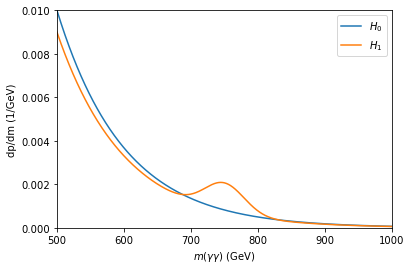

In [13]:
from scipy.stats import expon, norm
bkg = expon.freeze(loc=500, scale=100)
sig = norm.freeze(loc=750, scale=30)

import numpy as np
import matplotlib.pyplot as plt

m = np.linspace(500, 1000, 1000)
plt.plot(m, bkg.pdf(m), label='$H_0$')

def model(m, fsig):
    """normalized pdf for the mass distribution, fsig = signal fraction (0 <= fsig <= 1)"""
    return (1-fsig)*bkg.pdf(m) + fsig*sig.pdf(m)
plt.plot(m, model(m, 0.1), label='$H_1$')

plt.ylim(0, 0.010)
plt.xlim(500, 1000)
plt.legend()
plt.xlabel('$m(\gamma\gamma)$ (GeV)')
plt.ylabel('dp/dm (1/GeV)');

#### Step 2: We create a function that returns the test statistic $\ln Q$ for a given dataset.

In [14]:
def LL(evts, nsig):
    """
    returns log-likelihood for a model with nsig signal events,
    i.e., for a model with a signal fraction of nsig / #events
    """
    fsig = nsig / len(evts)
    return np.sum(np.log(model(evts, fsig)))

def lnQ(evts, nsig):
    """returns test statistic"""
    return LL(evts, nsig) - LL(evts, 0)

#### Step 3: We generate 1000 toy Monte Carlo (MC) simulations for $H_0$ and for $H_1$. For each simulation, we generate 1000 events. We plot one simulation for $H_0$ and one for $H_1$ in the same plot.

In [15]:
# number of pseudo data sets
ntoys = 1000

# list for the value of the test statistic for each pseudo data set
lnQ_B = []

# generate pseudo data sets (background only model)
for i in range(ntoys):

    # draw data points from background distribution
    toy = bkg.rvs(1000)
    
    # test statistic (assuming 30 signal events in H1)
    lnQ_B.append(lnQ(toy, 30))

# list for the value of the test statistic for each pseudo data set    
lnQ_SB = []

# generate pseudo data sets (signal + background model)
for i in range(ntoys):
    
    # generate data points (970 background events, 30 signal events)
    toyB = bkg.rvs(1000-30)
    toyS = sig.rvs(30)
    toy = np.concatenate((toyS, toyB))
    
    # test statistic (assuming 30 signal events in H1)
    lnQ_SB.append(lnQ(toy, 30))

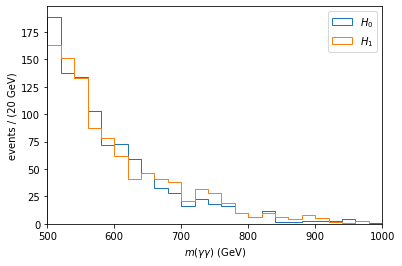

In [16]:
# generate an example of a background and a signal+background 
# pseudo data set and plot them together
toyBonly = bkg.rvs(1000)

toyB = bkg.rvs(1000-30)
toyS = sig.rvs(30)
toySB = np.concatenate((toyS, toyB))

plt.hist(toyBonly, bins=25, range=(500, 1000), histtype='step', label='$H_0$');
plt.hist(toySB, bins=25, range=(500, 1000), histtype='step', label='$H_1$');
plt.legend()
plt.xlabel('$m(\gamma\gamma)$ (GeV)')
plt.ylabel('events / (20 GeV)')
plt.xlim(500, 1000);

#### Step 4: For each toy MC, we calculate the test statistic and fill it in two histograms, one for $H_0$ and one for $H_1$. Then we plot the histograms on the same figure to compare them.

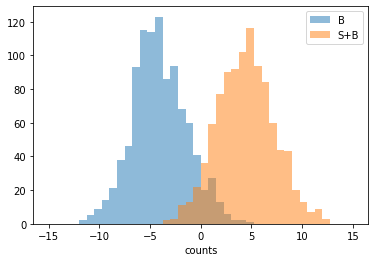

In [17]:
pltopts = dict(bins=40, range=(-15, 15), alpha=0.5)
plt.hist(lnQ_B, **pltopts, label='B');
plt.hist(lnQ_SB, **pltopts, label='S+B');
plt.legend()
plt.xlabel("test statistic lnQ");
plt.xlabel("counts");

#### Step 5. For this exercise, we will use a test size $\alpha = 5\%$. We determine the critical test statistic and draw a line for where it is in the histogram above.

The critical test statistic is tc = 0.7538


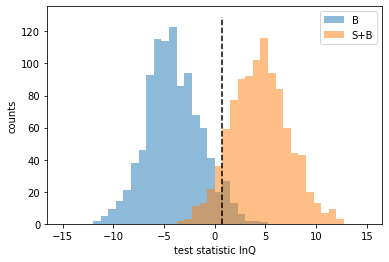

In [18]:
# test rule: the null hypothesis will be rejected if we observe t in the critical region t > tc
# alpha is the probability to reject H0 although it is actually true

tc = np.percentile(lnQ_B, 95)
print(f'The critical test statistic is tc = {tc:.4f}')

fig, ax = plt.subplots()
plt.hist(lnQ_B, **pltopts, label='B');
plt.hist(lnQ_SB, **pltopts, label='S+B');
plt.legend()
plt.plot([tc, tc], [0, ax.get_ylim()[1]], color='black', linestyle='dashed');
plt.xlabel("test statistic lnQ");
plt.ylabel("counts");

#### Step 6. Determine the power $1-\beta$ of the test.

In [19]:
# beta is the probability to accept H0 although it is actually false (i.e. H1 is true)
# a test has good performance if 1-beta is large

# The Neyman-Pearson lemma tells us that the likelihood-ratio Q 
# is the test sttistic that for a given size alpha gives us the highest power
oneminusbeta = np.sum(lnQ_SB>tc) / len(lnQ_SB)
print(f'The power of the test is 1-beta = {oneminusbeta}')

The power of the test is 1-beta = 0.913


### Now it is your turn!
#### Step 7.:  Read the data and plot them as a histogram. Evaluate the test-statistic for the data. What are the $p$-values of the data for both $H_0$ and $H_1$? To which significance do they correspond?

### Solution

In [1]:
import pandas as pd
d = pd.read_csv('https://www.physi.uni-heidelberg.de/~reygers/lectures/2020/smipp/two_photon_inv_masses.csv');
data = d['m']

In [2]:
# Your solution

#### Step 8: What is your conclusion on the existence of the new particle given the observed data?

In [3]:
# Your solution

## 7.4  Best fit (10 points)

Given is a set of 6 data points with an $x$ and $y$ value and an uncertainty in $y$ (see below). Implement three least square fits (a constant fit, a linear fit and a quadratic fit). Calculate the $\chi^2$/dof for each of the fits as well as the p-value. Plot the data together with the fit results and comment on the quality of the fits

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from pprint import pprint

xd     = np.array([ 1.,  2.,  3.,  4.,  5.,  6.])
yd     = np.array([1.1, 1.2, 1.3, 1.4, 2.0, 1.9])
yd_err = np.array([0.1, 0.1, 0.3, 0.1, 0.5, 0.2])


### Solution